Learning Rate: 0.001, Final Training Loss: 5824.8760
Learning Rate: 0.005, Final Training Loss: 5116.3286
Learning Rate: 0.01, Final Training Loss: 4509.1154
Learning Rate: 0.05, Final Training Loss: 3215.4143
Learning Rate: 0.1, Final Training Loss: 2979.1266
Learning Rate: 0.2, Final Training Loss: 2906.1003


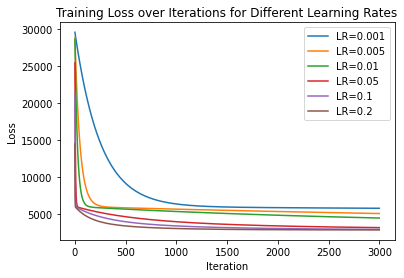

최적의 학습률: 0.2
Test MSE with Optimal Learning Rate: 2871.0777


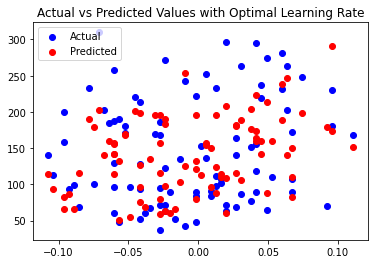

In [2]:
# 필요한 라이브러리 임포트
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 로드 및 준비
diabetes = load_diabetes()
df_X = diabetes.data  # 입력 데이터
df_y = diabetes.target  # 목표 데이터

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# 선형 회귀 모델 함수 정의
def model(X, W, b):
    return np.dot(X, W) + b

# 손실 함수 (MSE) 정의
def loss(X, W, b, y):
    y_pred = model(X, W, b)
    return np.mean((y - y_pred) ** 2)

# 기울기 계산 함수 정의
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = (2 / N) * X.T.dot(y_pred - y)  # 가중치 기울기
    db = 2 * (y_pred - y).mean()  # 절편 기울기
    return dW, db



# 개선 사항 1: 학습률 목록에 더 큰 학습률(0.2) 추가
# 초기 적용 코드
# learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
# iterations = 1000
# results = {}

# 개선 코드
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]  # 추가된 학습률 0.2
iterations = 3000  # 개선 사항 2: 반복 횟수를 1000에서 3000으로 증가하여 더 충분한 학습 진행
results = {}


# 여러 학습률에 대해 모델 학습 진행
for lr in learning_rates:
    W = np.random.randn(X_train.shape[1])  # 가중치 초기화
    b = np.random.randn()  # 절편 초기화
    losses = []

    # 학습 루프
    for i in range(1, iterations + 1):
        dW, db = gradient(X_train, W, b, y_train)
        W -= lr * dW
        b -= lr * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
    
    # 마지막 손실 저장 및 출력
    results[lr] = L
    print(f"Learning Rate: {lr}, Final Training Loss: {L:.4f}")

    # 학습 손실 시각화
    plt.plot(losses, label=f'LR={lr}')

# 학습 손실 그래프 시각화
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for Different Learning Rates')
plt.legend()
plt.show()

# 최적의 학습률을 선택하여 최종 모델 학습
best_lr = min(results, key=results.get)  # 손실이 가장 낮은 최적의 학습률 선택
print(f"최적의 학습률: {best_lr}")

# 최적의 학습률로 모델 재학습
W = np.random.randn(X_train.shape[1])  # 가중치 초기화
b = np.random.randn()  # 절편 초기화
losses = []

# 개선 사항: 최적의 학습률을 적용하고, 학습 데이터에 대해 더 많은 반복 수행
for i in range(1, iterations + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= best_lr * dW  # 최적 학습률(best_lr) 적용
    b -= best_lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)

# (10) test 데이터에 대한 성능 확인하기
# 테스트 데이터에 대한 예측 및 MSE 손실 계산
test_loss = loss(X_test, W, b, y_test)  # 테스트 데이터의 MSE 손실 계산
print(f"Test MSE with Optimal Learning Rate: {test_loss:.4f}")

# 테스트 데이터에 대한 예측 및 시각화
prediction = model(X_test, W, b)

# 시각화: 실제 당뇨병 진행도(y_test)와 모델 예측값(prediction)을 비교
plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual")  # 실제 당뇨병 진행도
plt.scatter(X_test[:, 0], prediction, color='red', label="Predicted")  # 예측된 당뇨병 진행도

# x축과 y축 라벨을 표시하지 않음
plt.legend()
plt.title("Actual vs Predicted Values with Optimal Learning Rate")  # 제목: 실제값과 예측값 비교
plt.show()
